In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

df = pd.read_csv('diamonds.csv')

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 53940
Number of columns: 10


In [3]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [4]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of numerical features</b>'))
df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00


In [5]:
#whisker stuff for carat
iqr_c = 1.04 - 0.40
lowerwhisker_c = 0.40 - 1.5*iqr_c
upperwhisker_c = 1.04 + 1.5*iqr_c
print(f"Lower whisker: {lowerwhisker_c}, Upper whisker: {upperwhisker_c}")

Lower whisker: -0.5599999999999999, Upper whisker: 2.0


In [6]:
df = df[(df['carat'] > lowerwhisker_c) & (df['carat'] < upperwhisker_c)]

In [7]:
#whisker stuff for width
iqr_y = 6.54 - 4.72
lowerwhisker_y = 4.72 - 1.5*iqr_y
upperwhisker_y = 6.54 + 1.5*iqr_y
print(f"Lower whisker: {lowerwhisker_y}, Upper whisker: {upperwhisker_y}")

Lower whisker: 1.9899999999999993, Upper whisker: 9.27


In [8]:
df = df[(df['y'] > lowerwhisker_y) & (df['y'] < upperwhisker_y)]

In [9]:
#whisker stuff for depth
iqr_z = 4.04 - 2.91
lowerwhisker_z = 2.91 - 1.5*iqr_z
upperwhisker_z = 4.04 + 1.5*iqr_z
print(f"Lower whisker: {lowerwhisker_z}, Upper whisker: {upperwhisker_z}")

Lower whisker: 1.2150000000000003, Upper whisker: 5.734999999999999


In [10]:
df = df[(df['z'] > lowerwhisker_z) & (df['z'] < upperwhisker_z)]

In [11]:
#whisker stuff for price
iqr_p = 5324.25 - 950.0
lowerwhisker_p = 5324.25 - 1.5*iqr_p
upperwhisker_p = 950.0 + 1.5*iqr_p
print(f"Lower whisker: {lowerwhisker_p}, Upper whisker: {upperwhisker_p}")

Lower whisker: -1237.125, Upper whisker: 7511.375


In [12]:
df = df[(df['price'] > lowerwhisker_p) & (df['price'] < upperwhisker_p)]

In [13]:
df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
carat,45514.0,0.651037,0.315449,0.20,0.36,0.56,0.91,1.96
depth,45514.0,61.759848,1.427645,43.00,61.10,61.80,62.50,79.00
table,45514.0,57.390460,2.237125,43.00,56.00,57.00,59.00,79.00
x,45514.0,5.416562,0.883230,3.73,4.59,5.30,6.22,8.10
y,45514.0,5.419919,0.876001,3.68,4.59,5.30,6.22,8.05
z,45514.0,3.346268,0.548090,2.06,2.82,3.26,3.86,5.12
price,45514.0,2490.446895,1912.847077,326.00,861.00,1819.00,3897.00,7511.00


In [14]:
#encoding cut
cut = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
df['cut'].replace(cut, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,4,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [15]:
#encoding color
color = {'D': 6, 'E': 5, 'F': 4, 'G': 3, 'H': 2, 'I': 1, 'J': 0}
df['color'].replace(color, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,4,5,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,5,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,5,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,1,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,0,SI2,63.3,58.0,4.34,4.35,2.75,335


In [16]:
#encoding clarity
clarity = {'I2': 0, 'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
df['clarity'].replace(clarity, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,4,5,2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,5,3,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,5,5,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,1,4,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,0,2,63.3,58.0,4.34,4.35,2.75,335


In [17]:
print(f"This is the dataset shape: {df.shape} \n")
print(f"These are the data types; 'object' stands for string type:")
print(df.dtypes)

This is the dataset shape: (45514, 10) 

These are the data types; 'object' stands for string type:
carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


In [18]:
#Changing name of columns
df.columns = df.columns.str.lower().str.strip()

columns_mapping = {
    'depth': 'depth percentage',
    'x': 'length',
    'y': 'width',
    'z': 'depth',
}

df = df.rename(columns = columns_mapping)
df.sample(5, random_state=999)

,carat,cut,color,clarity,depth percentage,table,length,width,depth,price
6970,1.00,0,2,3,56.3,63.0,6.63,6.61,3.73,4150
39891,0.42,3,4,5,61.8,59.0,4.83,4.81,2.98,1103
32070,0.33,3,6,3,60.4,60.0,4.46,4.41,2.68,780
10290,1.00,1,3,3,57.2,59.0,6.66,6.62,3.80,4758
12340,1.01,3,5,3,60.5,62.0,6.50,6.46,3.92,5226


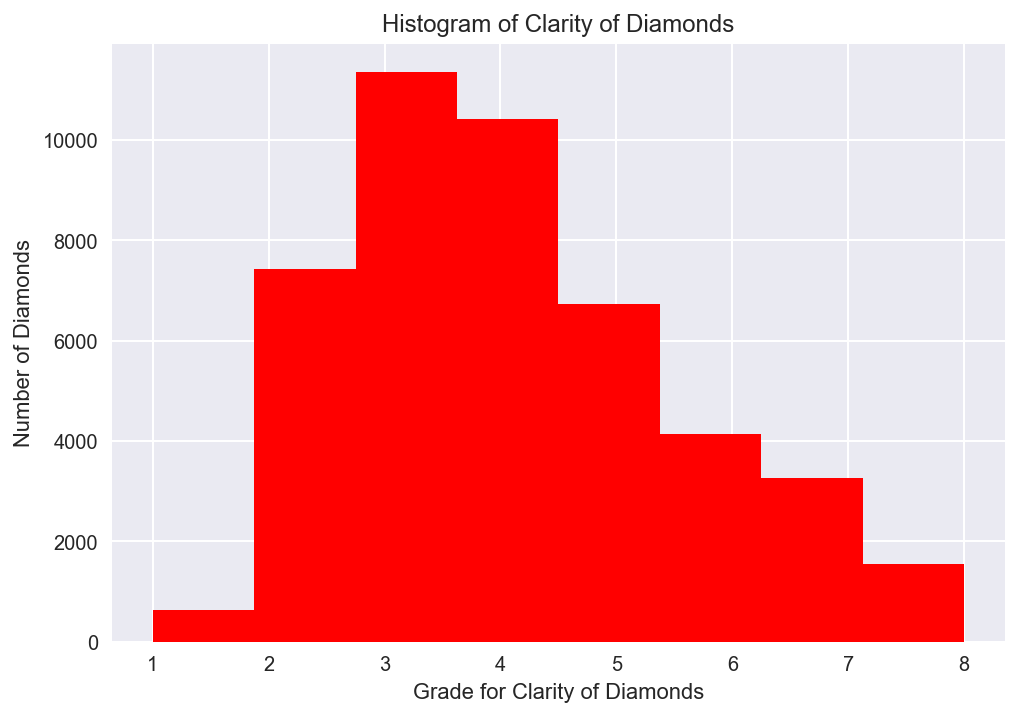

In [40]:
#clarity histogram
plt.title("Histogram of Clarity of Diamonds")
plt.hist(df['clarity'], bins=8, color='red')
plt.xlabel("Grade for Clarity of Diamonds")
plt.ylabel("Number of Diamonds")

plt.show()

Text(0.5, 1.0, 'Scatter Plot for Carat vs Price of Diamonds')

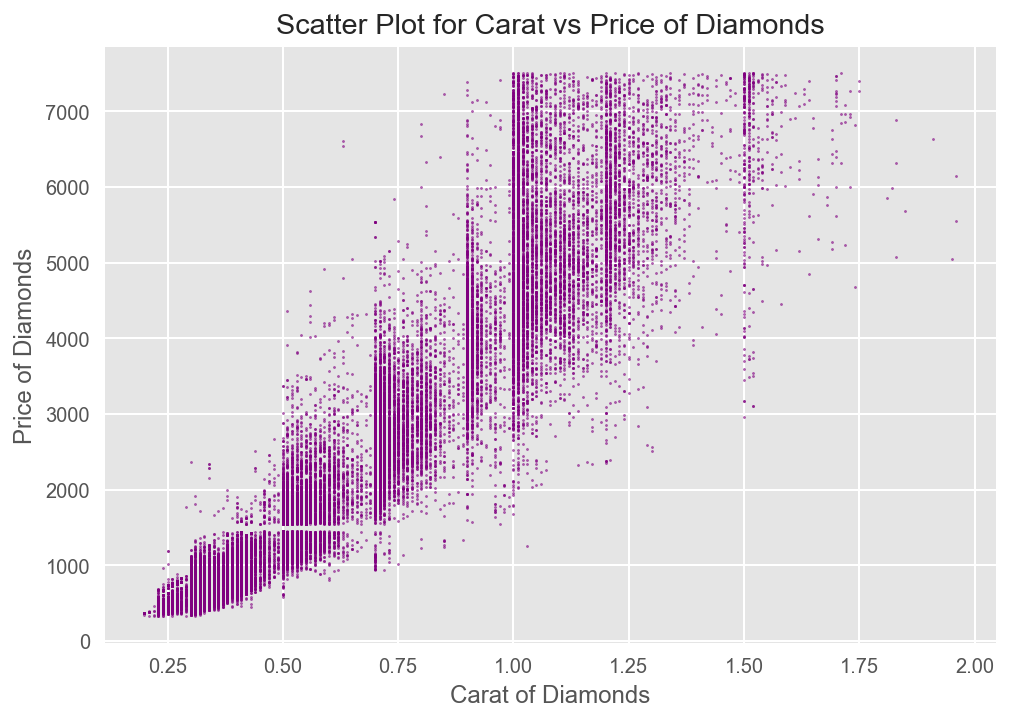

In [57]:
#scatter plot for carat and price
x = df['carat']
y = df['price']
plt.scatter(x, y, s = 0.9, color = 'purple', alpha = 0.5)
plt.xlabel("Carat of Diamonds")
plt.ylabel("Price of Diamonds")
plt.title("Scatter Plot for Carat vs Price of Diamonds")

<AxesSubplot:xlabel='cut', ylabel='clarity'>

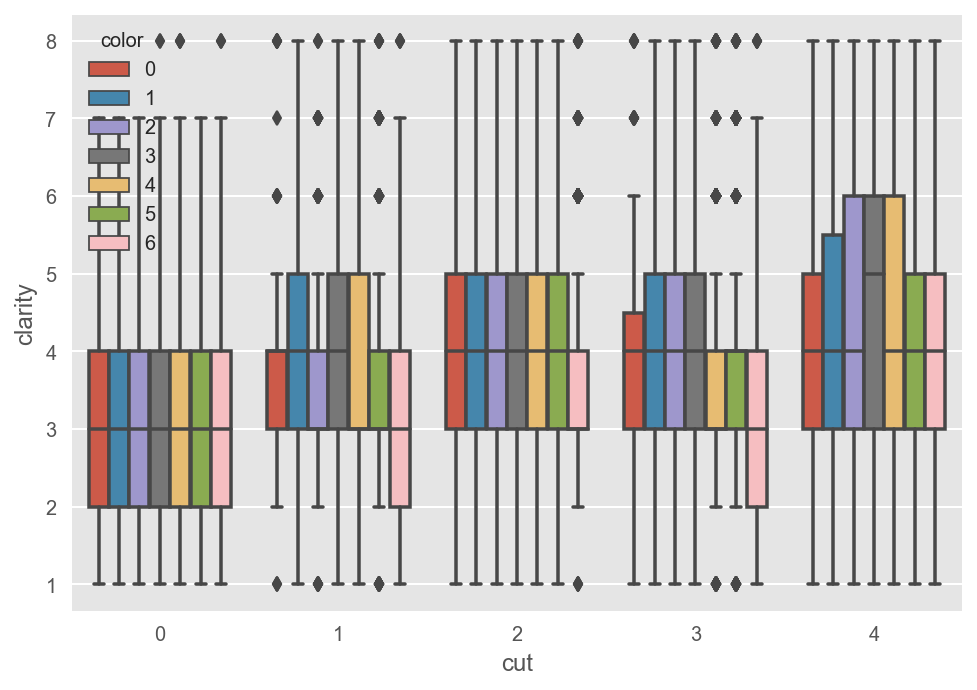

In [69]:
#boxplot for cut, clarity and colour
sns.boxplot(df['cut'], df['clarity'], hue = df['color'])

Text(0.5, 1.0, 'Scatter plot of Price by Carat coloured by Clarity')

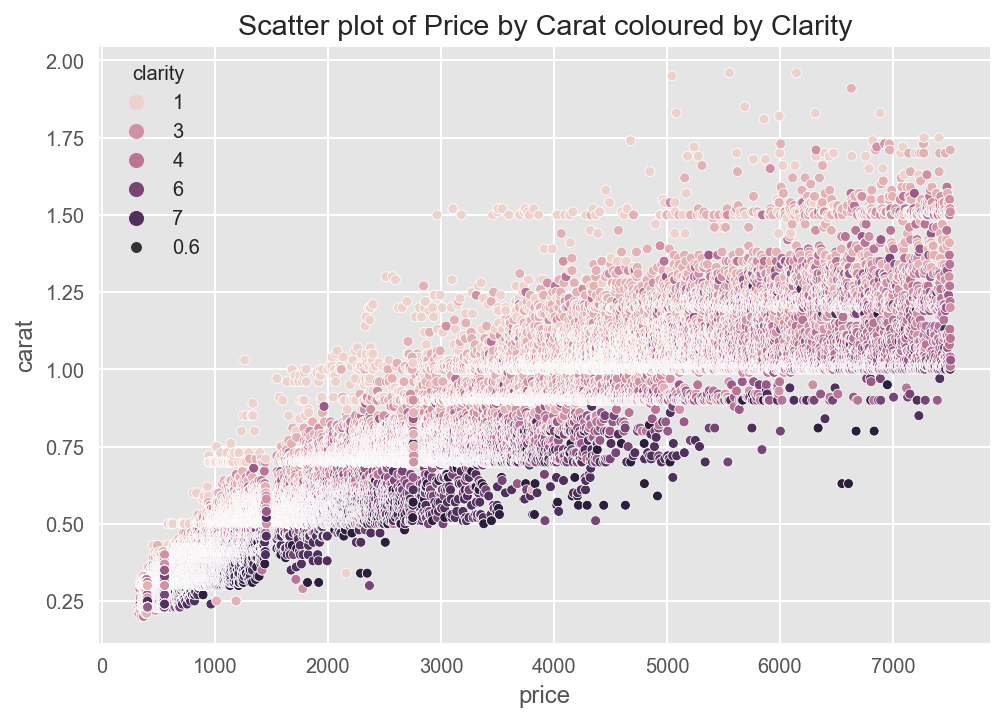

In [78]:
#carat, clarity, price scatter
sns.scatterplot(df['price'], df['carat'], hue = df['clarity'], size = 0.6)
plt.title("Scatter plot of Price by Carat coloured by Clarity")